In [15]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [16]:
def f_XY(x, y):
    if 1 <= y <=6 and 1 <= x-y <=6:
        return y * (x-y) /441
    else:
        return 0

In [17]:
XY = [x_set, y_set, f_XY]

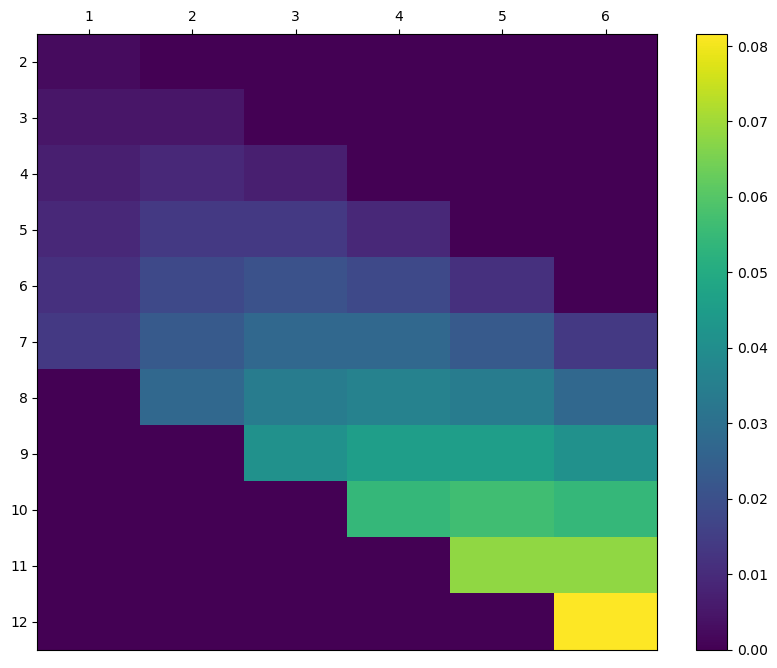

In [18]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)

ax.invert_yaxis()

ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [19]:
np.all(prob >= 0)

np.True_

In [20]:
np.sum(prob)

1.000

In [21]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [22]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [23]:
X = [x_set, f_X]
Y = [y_set, f_Y]

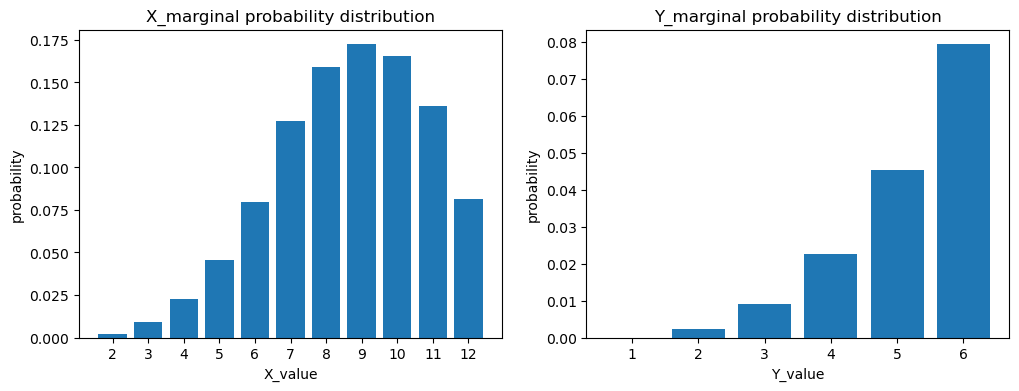

In [24]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_X(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

In [25]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667

In [26]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
    for x_i in x_set for y_j in y_set])

In [27]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.667

In [28]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333

In [29]:
a, b = 2, 3

In [30]:
E(XY, lambda x, y: a*x + b*y)

30.333

In [31]:
a * mean_X + b * mean_Y

30.333

In [32]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
        for x_i in x_set for y_j in y_set])

4.444

In [33]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
    for x_i in x_set for y_j in y_set])

In [34]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444

In [35]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.222

In [36]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
    for x_i in x_set for y_j in y_set])

In [37]:
cov_xy = Cov(XY)
cov_xy

2.222

In [38]:
V(XY, lambda x, y: a*x + b*y)

64.444

In [39]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.444

In [40]:
cov_xy / np.sqrt(var_X * var_Y)

0.707